# Information theory visualized

This notebook creates a few figures to illustrate various simple concepts from information theory

First version: 9/15/2024

This version: 9/29/2025

https://northeastern-datalab.github.io/cs7840/fa25/calendar.html

In [2]:
import sys
sys.path.append("../")
import numpy as np
from entropy_models import(calculate_entropy,
                           calculate_entropy_vector,
                           plot_figure,
                           markov_chain_stationary,
                           markov_chain_sample,
                           calculate_relative_entropy,
                           calculate_relative_entropy_vector)
# from scipy.stats import entropy
import matplotlib.pyplot as plt
# import timeit

# 1: Property of Entropy (k=2 options)

### 1A: Show binary entropy curve

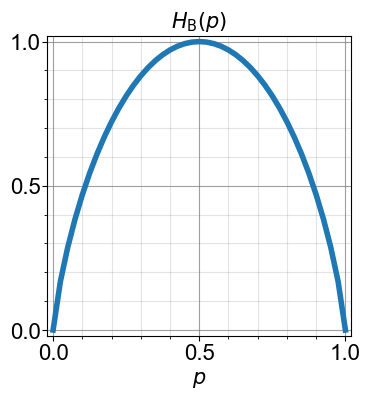

0.2863969571159562


In [4]:
P = np.linspace(0, 1, 41)
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution

Y = calculate_entropy_vector(P_vec)
# print(Y)
plot_figure(P, Y, low=-0.02, high=1.02, title=r"$H_{\mathrm{B}}(p)$", show_legend=False, 
            fine_grid=True, xlabel=r'$p$',
            ylabel=None, pdfname="Fig_Binary_Entropy", linewidth=(4,), squaresize=True)
P = np.array([0.05, 0.95])
print(calculate_entropy(P))

### 1b: Show binary entorpy curve with annotations

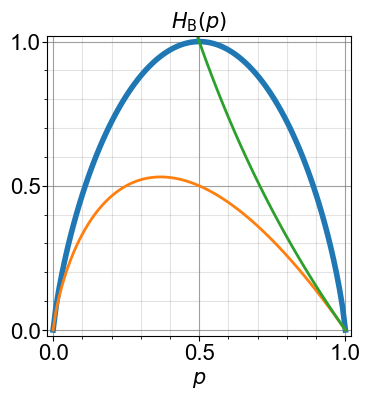

In [3]:
P = np.linspace(0, 1, 101)

# overall entropy
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution
Y = calculate_entropy_vector(P_vec)

# Expected surprise from p
with np.errstate(divide='ignore'):  # most efficient to temporarily ignore the inf error warning, also allows simple generalization to multi-dimensional arrays
    res = -np.log2(P)               # https://stackoverflow.com/questions/21752989/numpy-efficiently-avoid-0s-when-taking-logmatrix
res[np.isinf(res)] = 0
Z = P*res

# Surprise from p if p happens
with np.errstate(divide='ignore'):  # most efficient to temporarily ignore the inf error warning, also allows simple generalization to multi-dimensional arrays
    res = -np.log2(P)               # https://stackoverflow.com/questions/21752989/numpy-efficiently-avoid-0s-when-taking-logmatrix
res[np.isinf(res)] = 10000

# print(Y)
plot_figure(P, [Y,Z, res], low=-0.02, high=1.02, title=r"$H_{\mathrm{B}}(p)$", show_legend=False, fine_grid=True, xlabel=r'$p$',
            ylabel=None, pdfname="Fig_Binary_Entropy_annotated", linewidth=(4,2, 2), squaresize=True)

### 1c: Show entropy in the number of coin flips. Problem 2.1 from [Cover, Thomas'06]

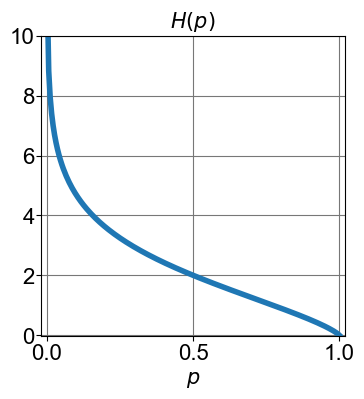

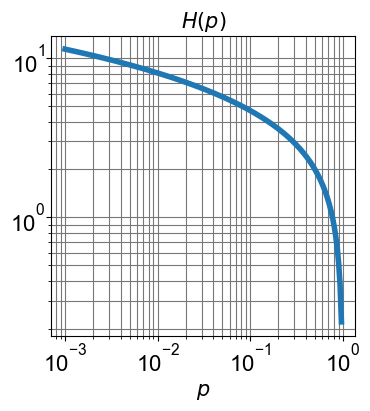

In [4]:
P = np.linspace(0.001, 1, 201)
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution

Y = calculate_entropy_vector(P_vec) # binary entropy
Z = Y/P     # actual entropy according to formula
plot_figure(P, Z, low=-0.02, high=1.02, ymax=10, title=r"$H(p)$", show_legend=False, fine_grid=False, xlabel=r'$p$',
            ylabel=None, pdfname="Fig_CoinFlip_Entropy", linewidth=(4,), squaresize=True)

P = np.logspace(-3, 0, 201, endpoint=False)
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution
Y = calculate_entropy_vector(P_vec)
Z = Y / P  # actual entropy according to formula
plot_figure(P, Z, low=-0.02, high=1.02, ymax=10, title=r"$H(p)$", show_legend=False, fine_grid=False,
            xlabel=r'$p$', logscale=True,
            ylabel=None, pdfname="Fig_CoinFlip_Entropy_logscale", linewidth=(4,), squaresize=True)

# 2: Markov Chains

### 2A: Restaurants

In [5]:
P_matrix = np.array([[0.7, 0.2, 0.1],
                     [0.3, 0.6, 0.1],
                     [0.3, 0.2, 0.5]])
print("Transition matrix:")
print(P_matrix)

mu = markov_chain_stationary(P_matrix)
print("Stationary distribution:", mu)

st = markov_chain_sample(P_matrix, 1000, int_to_char={0: 'B', 1: 'M', 2: 'S'})
print("A random sample:")
print(st)

print("Entropy of the MC and the Stationary Distribution (SD)")
entropy_MC = mu.dot(calculate_entropy_vector(P_matrix))
print(entropy_MC)
entropy_SD = calculate_entropy(mu)
print(entropy_SD)

Transition matrix:
[[0.7 0.2 0.1]
 [0.3 0.6 0.1]
 [0.3 0.2 0.5]]
Stationary distribution: [0.5        0.33333333 0.16666667]
A random sample:
BBBBBSBBBBBBBSSSSSSBBBSSSSSSSSBMBBMMSSSMMMMMMSSMMMBMBBMMBBBBBBBBBBBBBBBBBMBBMMMBBBBMMMMBBBMMBBBBMMSMMMBBBBBMMMMBBBBBBMMMMBBBBMMMBBMMBBMBBBMMMMBBSMMBBBBBBBBSSBBSBSMMMMMSMBBBBBMSSSSBBMSMSBBBBBMMSSSBBBBBBBMMMMMSBMSMMBBBBBBBBMBMMBBBMMSSBBBBSMMMMBMMMMBBBMMMMMMMMSBBBBBBBBBBBBBBBSSMBBBBMBSSSSMBBBBMMMBBMSMBSSSMMBBBBBMMMMMMMMMBBBBBBMMMMBBBBBBSSSBBBBBBBBBBBMMMBMMBSMSSSBBBBBBBBBBMBBBSSBBMBBBBBBBBMMBBBBBBBBBBBSSBBMBBBBBMMMMBSMMMBBSSSBBBBBBSSBBSBMBBBBMMMBBMMBMMMMMBBMMBMBBBMMMBBSBBBBBBMMMMMMMMBBBBBMMSSSBBBSSSSSSMMBBSMBSMMBBMBMBBBBMMBBBBBBSSSSMBBBMMBBMBMBBMMMMBSSSSBBMBBBBMMMBMSSSSSBMBBBBBMMBMMMMMMSSSBBBSBBBBBBBMSSSSBMMBBBMMSBBBBBBBBBBBBSSSMMMSSSSSMMMSSMMBBBBBSSSMBBBMMMMSSSBMMMMMBBBBBBBSMMMMMMMMBBBBBMBMSSMSSMMMMMMMMBMMBBBBMMBSBBMMSSMBBBBSBBBMMMMMBSSSBBMSBBBSSBMMMMSMMMMMMBBSMMBBMMMBBBBMMBBBBMMBBBBBSBBBMBBBBSBBBMSBMMMMMBBMMMMBBBBBMBSMMSBBMBSSSSSBBMBBBBBMMMSBBBBMSB

In [6]:
# re-use the code to create a sample with IID sampled letters
print("\nSame example, now assuming IID samples:")
P_matrix = np.array([mu, mu, mu])
mu = markov_chain_stationary(P_matrix)
print("Transition matrix:")
print(P_matrix)
print("Stationary distribution:", mu)

st = markov_chain_sample(P_matrix, 1000, int_to_char={0: 'B', 1: 'M', 2: 'S'})
print("A random sample:")
print(st)

print("Entropy of the MC and the Stationary Distribution (SD)")
entropy_MC = mu.dot(calculate_entropy_vector(P_matrix))
print(entropy_MC)


Same example, now assuming IID samples:
Transition matrix:
[[0.5        0.33333333 0.16666667]
 [0.5        0.33333333 0.16666667]
 [0.5        0.33333333 0.16666667]]
Stationary distribution: [0.5        0.33333333 0.16666667]
A random sample:
MMSMBBBSMMSBMBSBMBBMBMBBMBBMMMSMBMSBMBSBSSBBMMBMMMMSSMBMBBSMBBMBBBMBSBBBBBSBMSMMBMBBBBBBMBMMBBMBBBBBMBBBMMBBBMMBBBBMMBSMBSMSBBSBBSMMMBSBBSBMBBBBMBSBMMBBMSBBBBBBBBMMBBBBSBBSBBMBMBBBBBMSBMMBBSBBBBBSSBBBBBBBMBBBBBBBMMSMSMMBBBBSBBBMBBSMBMSMSSMBMMBMBSMMBMBBBSSBSMBMBMMBSMMBSBBBBMBBBBMBMMSMMBMBBMBMSBBBMBSMMBMBBBMSBMBBBSMMSSSMBBMBBBSBBMSBMMBSMMBBMBSBMMBMBBBBBBSBMMMBSSBSMBBBMSBMBBSBBMBBBSBBMMBMBBMBMBBBMMMMBMBBMSMBMBBMBSMMSSMBBSBBMMMMBBSBBMSMMMBBBMBMSMBBBSBMBBBBBBBMBBBBBMBMMMBBMBMSMMBBMBBMSBBBBBMMBBBMSBBBMSMBBBSBSBBBSMMBBBBSSBBMBMMMSBMBBBMMMMMBMMBBMMBMMBBMSBSBBBBBMBSSSBMMBBBMBBMBBBMMBSBSBSBSBBBBMBSMMBMBBSMBBBBBBBBBBMMBMBMMSSMBBBMBBSBSSBBBMBMMMBBMBSBBSMBMBBMMBBBMMMBBBSBSMBBMMBBBMMSBSBSBBSMBBMSBMBBBMBMMBMSSSBBSSBBBMMBBMBMMMMBBMMMSBMMMSBMBSMSBSBBBBBBBBMBSSB

### 2B: Simple two-state Markov Chain

In [7]:
p = 0.95
P_matrix = np.array([[p, 1-p],
                     [1-p, p]])
print("Transition matrix:")
print(P_matrix)

P = markov_chain_stationary(P_matrix)
print("Stationary distribution:", P)

st = markov_chain_sample(P_matrix, 1000)
print("A random sample:")
print(st)

print("Entropy of the MC and the Stationary Distribution (SD)")
entropy_MC = P.dot(calculate_entropy_vector(P_matrix))
print(entropy_MC)
entropy_SD = calculate_entropy(P)
print(entropy_SD)

Transition matrix:
[[0.95 0.05]
 [0.05 0.95]]
Stationary distribution: [0.5 0.5]
A random sample:
AAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBAAAAAAAABBBBAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBAAAABBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAABBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBAAAAAAAAABBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAABBBAAAABBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAABBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBABBBBBB

In [8]:
p = 0.05
P_matrix = np.array([[p, 1-p],
                     [1-p, p]])
print("Transition matrix:")
print(P_matrix)

P = markov_chain_stationary(P_matrix)
print("Stationary distribution:", P)

st = markov_chain_sample(P_matrix, 1000)
print("A random sample:")
print(st)

print("Entropy of the MC and the Stationary Distribution (SD)")
entropy_MC = P.dot(calculate_entropy_vector(P_matrix))
print(entropy_MC)
entropy_SD = calculate_entropy(P)
print(entropy_SD)

Transition matrix:
[[0.05 0.95]
 [0.95 0.05]]
Stationary distribution: [0.5 0.5]
A random sample:
ABABABABABABABABBABABABABABABABABABABABABABABABABABABABAABABABABAABABABABBABABABABABABABABABBABABABABAABABABABABABABABABABABAABABABABABABABABABABABABABABABABABABABABABAABABABABABABABABABABAABABABABABABABABABABABBABABABABABABABABBABABABABABABABABABABBBABABABABABABABABABBABABABABABABABABABABABABABABABABABABABABABABABABABABBABABABAABABAABABABABABABABABABABABABABABABABABABABABABABABABABABABABABAABABABABABAABABBBABABABABABABABABBABABABABABABBABABABBABABABABABABAABABABABABABABABABABABABABABABABABABABAAABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABABAABBABBABAABABABABABABABABABABABABABABABAABBABABABABABAABABBABABABBABABABABABABABABABABABABABABABABABABABABAABABABABABABABAABABABABABABAABABBABABABBABABABABABABABABABABABABABABABBABABABABABABABABAABABABABBABAABABAABABBABABABABABABABAABBABABABABABABABABABABABABABABABABABABABABBABABABABABABABABABABABABABABAAABABABABABABABABBABA

# 3: Relative Entropy

Compares the relative entropy of a skewed binary distribution against the uniform distribution (in both directions)

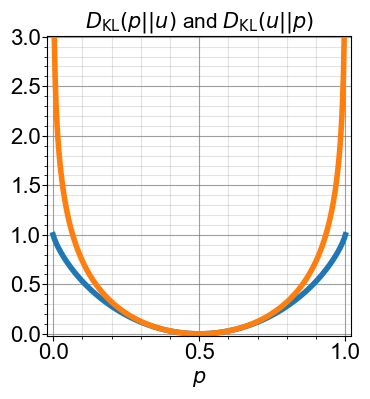


0.9192068641040888
2.3291778797349196


In [12]:
P = np.linspace(0, 1, 301)
P_vec = np.array([P, 1-P]).transpose()      # create 2D distribution
U_vec = np.repeat(np.array([[0.5, 0.5]]), 301, axis=0)

RE1 = calculate_relative_entropy_vector(P_vec, U_vec)
RE2 = calculate_relative_entropy_vector(U_vec, P_vec)

plot_figure(P, (RE1, RE2), ymax=3.01, low=-0.02, high=1.02, title=r"$D_{\mathrm{KL}}(p||u)$ and $D_{\mathrm{KL}}(u||p)$", show_legend=False, fine_grid=True, xlabel=r'$p$',
            ylabel=None, pdfname="Fig_Relative_Entropy_Assymmetry",
            linewidth=(4,4), squaresize=True)

P = np.array([0.01, 0.99])
U = np.array([0.5, 0.5])
print()
print(calculate_relative_entropy(P, U))
print(calculate_relative_entropy(U, P))

# 4: Mutual Information vs Correlation

Comparing MI and covariance for two binary variables (thus, with a 2×2 contingency table)

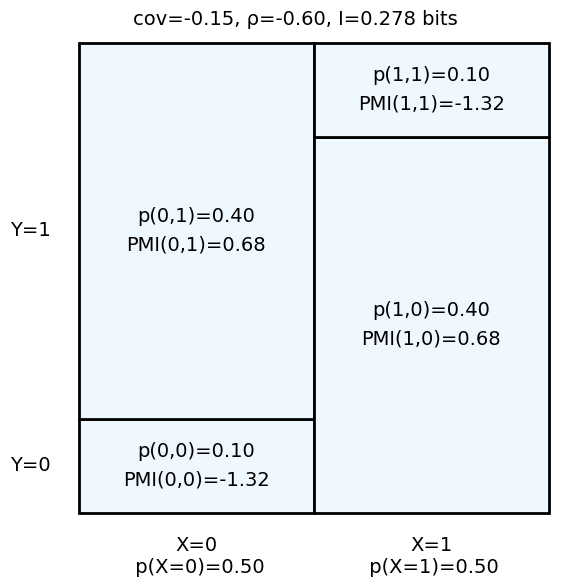

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle


# --- Different choices for Joint probabilities p(x,y): rows X=0,1 / columns Y=0,1
CHOICE = 3

if CHOICE == 1:
    # Independence: Cov=0, ρ=0, I=0
    p = np.array([[0.25, 0.25],
                  [0.25, 0.25]], dtype=float)
    
elif CHOICE == 2:
    # Strong positive association (balanced marginals): Cov=0.15, ρ=0.60, I=0.2781
    p = np.array([[0.40, 0.10],
                  [0.10, 0.40]], dtype=float)
    
elif CHOICE == 3:
    # Strong negative association (balanced marginals): Cov=-0.15, ρ=-0.60, I=0.2781
    # Notice MI doesn’t carry a sign; it’s symmetric in dependence strength.
    p = np.array([[0.10, 0.40],
                  [0.40, 0.10]], dtype=float)
    
elif CHOICE == 4:
    # Deterministic relation: Cov=0.19, ρ=1, I=H(X)=H(Y)=0.811
    p = np.array([[0.25, 0.00],
                  [0.00, 0.75]], dtype=float)
    
elif CHOICE == 5:
    # Deterministic relation: Cov=0.25, ρ=1, I=H(X)=H(Y)=1
    p = np.array([[0.50, 0.00],
                  [0.00, 0.50]], dtype=float)
        
elif CHOICE == 6:
    # Moderate positive association (balanced marginals)
    p = np.array([[0.35, 0.15],
                  [0.15, 0.35]], dtype=float)
    
elif CHOICE == 7:
    p = np.array([[0.20, 0.30],
                  [0.00, 0.50]], dtype=float)
    
    
# --- Compute various measures ---    
# Marginals
px = p.sum(axis=1)              # P(X)
py = p.sum(axis=0)              # P(Y)

# Layout: column widths = P(X); row heights (inside each column) = P(Y|X)
py_given_x = p / px[:, None]    # shape (2,2), rows sum to 1

# Pointwise Mutual Information (base-2)
with np.errstate(divide='ignore', invalid='ignore'):
    pmi = np.log2(p / (px[:, None] * py[None, :]))

# Covariance: Cov(X,Y) = E[XY] - E[X]E[Y]
Ex = (px[1]*1 + px[0]*0)
Ey = (py[1]*1 + py[0]*0)
Exy = p[1,1]  # since only (1,1) contributes
cov = Exy - Ex*Ey

# Pearson correlation
varx = Ex*(1-Ex)
vary = Ey*(1-Ey)
rho = cov / np.sqrt(varx*vary)

# Mutual information (in bits)
MI = np.nansum(p * pmi)


# --- Plot mosaic ---
fig, ax = plt.subplots(figsize=(6, 6))

x = 0.0
for i in range(2):                 # columns: X=0 (left), X=1 (right)
    w = px[i]                      # width = P(X=i)
    y = 0.0
    for j in range(2):             # rows in column i: Y=0 bottom, Y=1 top
        h = py_given_x[i, j]       # height = P(Y=j | X=i)
        if h>0:
            # rectangle with strong border; no fill (use facecolor="none")
            rect = Rectangle((x, y), w, h, linewidth=2, edgecolor="black", facecolor="aliceblue")
            ax.add_patch(rect)
    
            # Centered annotations: probability on top line, PMI below it
            cx, cy = x + w/2, y + h/2
            
            ax.text(cx, cy + 0.03, f"p({i},{j})={p[i,j]:.2f}", ha="center", va="center", fontsize=14)
            ax.text(cx, cy - 0.03, f"PMI({i},{j})={pmi[i,j]:.2f}", ha="center", va="center", fontsize=14)
    
            y += h

    # Column labels: X value and marginal directly beneath vertical boundary
    ax.text(x + w/2, -0.05, f"X={i}\n p(X={i})={px[i]:.2f}", ha="center", va="top", fontsize=14)
    x += w

# Optional Y labels on the left, centered in the two bands (use first column's split)
y0_height = py_given_x[0, 0]
center_Y0 = y0_height / 2
center_Y1 = y0_height + (1 - y0_height) / 2
ax.text(-0.06, center_Y0, "Y=0", ha="right", va="center", fontsize=14)
ax.text(-0.06, center_Y1, "Y=1", ha="right", va="center", fontsize=14)

# Title with covariance, correlation, MI
ax.set_title(f"cov={cov:.2f}, ρ={rho:.2f}, I={MI:.3f} bits", fontsize=14)
ax.set_xlim(-0.1, 1.02)
ax.set_ylim(-0.1, 1.02)
ax.set_aspect("equal")
ax.axis("off")

plt.tight_layout()
plt.show()
